In [106]:
import sys
import matplotlib.pyplot as plt
import pydicom as dcm
import SimpleITK as sitk

In [107]:
sys.path.append("../")

In [108]:
from Registration.dicom_registration import register_patient
# from sitk_img_tools import get_start_position_sitk

In [109]:
#for reloading modules when you change code in python files
import importlib
import Registration.dicom_registration
importlib.reload( Registration.dicom_registration)
import sitk_img_tools
importlib.reload( sitk_img_tools)

<module 'sitk_img_tools' from '/home/kayla/toolkit/longiDICOM/code/Examples/../sitk_img_tools.py'>

In [110]:
# Define your paths
PATH = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/' # Path to patient files
save_path = '/data/kayla/HNC_images/test/' # Path to save jsons

In [111]:
# Sample patient
patient = '147'
patient_path = PATH+ patient+'/'

## Demo registering images - uses the REG file (same way it was registered in TPS)

In [112]:
# Register the patient CBCT images
image_dict = register_patient(patient_path, True) #the second parameter is use_reg_file = True, set to false to use the optimizer 

/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/147/
- Loading files from /mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/147/  -
['20190712_CT_05_JUL_2019']
['20190813_kV_CBCT_21a', '20190822_kV_CBCT_28a', '20190815_kV_CBCT_23a', '20190829_kV_CBCT_33a', '20190715_kV_CBCT_1a', '20190809_kV_CBCT_19a', '20190726_kV_CBCT_10a', '20190724_kV_CBCT_8a', '20190827_kV_CBCT_31a', '20190820_kV_CBCT_26a', '20190801_kV_CBCT_14a', '20190719_kV_CBCT_5a', '20190807_kV_CBCT_17a', '20190730_kV_CBCT_12a']
False
--------------------------------------------------------
-                   Registering CBCTs                  -
--------------------------------------------------------
20190715_kV_CBCT_1a
RE -  /mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/147/20190715_kV_CBCT_1a/RE.1.2.246.352.221.49296791292763617353492637716670640555.dcm
20190719_kV_CBCT_5a
RE -  /mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/147/20190719_kV_CBCT_5a/RE.1.2.246.352.221.543674430968074614012384247961797166518.dc

In [113]:
'''
The iamge dict contains:
 - the origianl CBCTs and the resmapled (registered) CBCTs
 - names of the CT files and the CBCT files
 - registration matrices used to register the images
 - starting position and spacing of the original CT (which should also be the same spacing as the registered CBCTs)
 - the isocentre is currently broken
 
'''

image_dict

{'20190712_CT_05_JUL_2019': {'UID': '1.2.246.352.221.559012132397575527915459909100518792607',
  'CBCTs': ['20190715_kV_CBCT_1a',
   '20190719_kV_CBCT_5a',
   '20190724_kV_CBCT_8a',
   '20190726_kV_CBCT_10a',
   '20190730_kV_CBCT_12a',
   '20190801_kV_CBCT_14a',
   '20190807_kV_CBCT_17a',
   '20190809_kV_CBCT_19a',
   '20190813_kV_CBCT_21a',
   '20190815_kV_CBCT_23a',
   '20190820_kV_CBCT_26a',
   '20190822_kV_CBCT_28a',
   '20190827_kV_CBCT_31a',
   '20190829_kV_CBCT_33a'],
  'resampled_CBCTs': [<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x7f9d23335600> >,
   <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x7f9d23337870> >,
   <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x7f9d233f1960> >,
   <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x7f9d23335bd0> >,
   <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Im

## Generating and plotting SITK images

In [114]:
from sitk_img_tools import generate_sitk_image
# note these are also imported in the registration import

In [115]:
CT = '20190712_CT_05_JUL_2019'
ct_sitk = generate_sitk_image(patient_path + CT+"/")

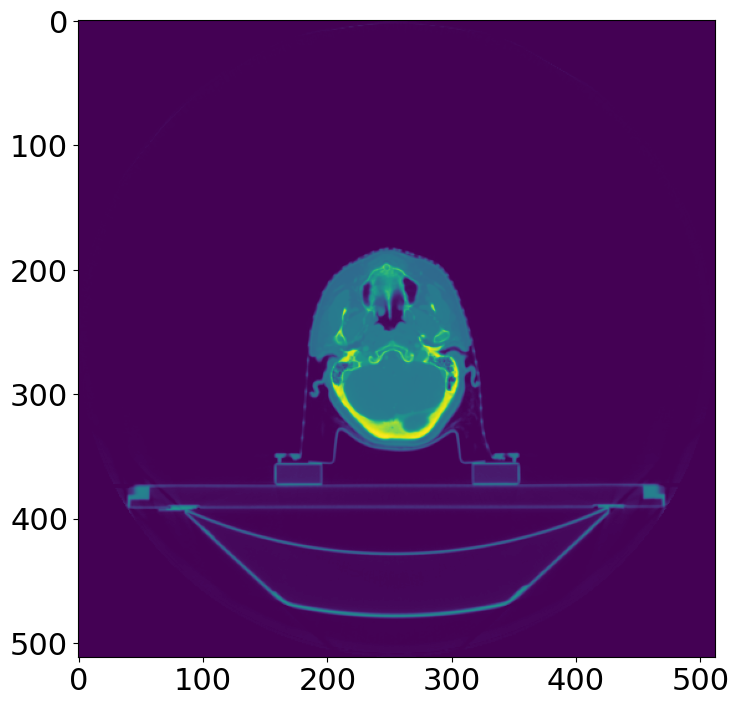

In [116]:
plt.imshow(sitk.GetArrayFromImage(ct_sitk)[100])

## Demo using structures from RS

In [128]:
from rs_tools import *
from Slice_Selection.slice_selection import get_image_slice

In [127]:
import rs_tools
importlib.reload( rs_tools)
import Slice_Selection.slice_selection
importlib.reload( Slice_Selection.slice_selection)

<module 'Slice_Selection.slice_selection' from '/home/kayla/toolkit/longiDICOM/code/Examples/../Slice_Selection/slice_selection.py'>

In [119]:
RS_file = find_RS_file(patient_path + CT)
RS = dcm.dcmread(patient_path + CT+'/'+RS_file) # should do os.join.path

In [120]:
# search for keyword
subgland_ROI_names = find_ROI_names(RS,keyword='sub') # no keywords will show you all ROI names
print(subgland_ROI_names)

['Glnd_Submand_R', 'Glnd_Submand_L']


In [121]:
# get contour of glands
dict_contours, z_lists = get_all_ROI_contours(subgland_ROI_names, RS)
roi_slice, z_smg = get_avg_ROI_z_and_slice(z_lists) # z _smg = centre of roi (z wise)

In [122]:
# get the start positions of the CBCT
start_x, start_y, start_z, spacing = get_start_position_sitk(image_dict[CT]['resampled_CBCTs'][0])
#start_x, start_y, start_z, spacing = get_start_position_dcm(patient_path+'20190712_CT_05_JUL_2019/')\
print(start_x,start_y,start_z,spacing)

-315.0 -225.0 -800.5 (1.23046875, 1.23046875, 3.0)


In [123]:
# you can either pick an image slice by hand 
# image_slice = 100
# or use this to find the centre of an ROI
img_slice = get_image_slice(start_z, z_smg, spacing)

In [124]:
# get the X Y values of the ROIs for a given slice to plot
roi_x, roi_y = get_ROI_pixel_array(dict_contours[subgland_ROI_names[0]][roi_slice],start_x,start_y,spacing)

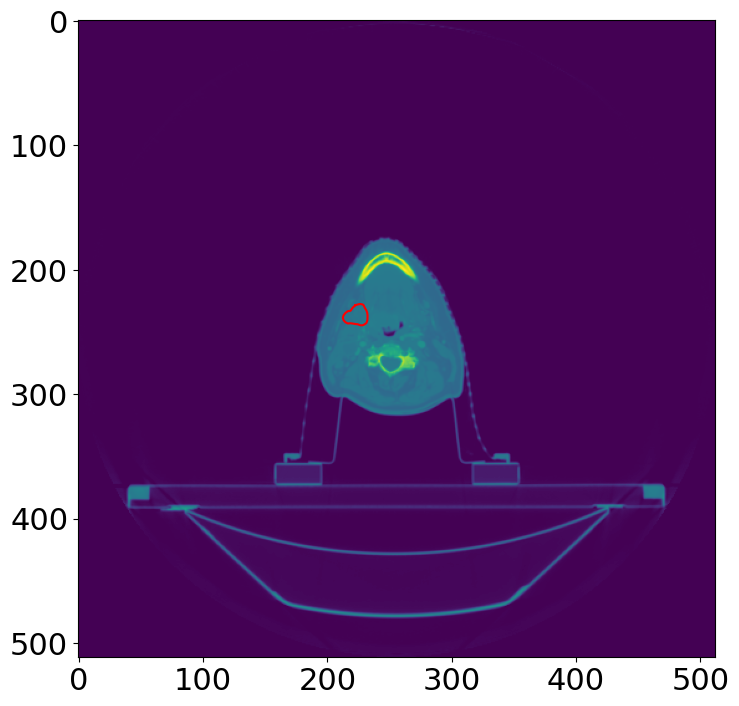

In [129]:
# plot the ROI on the original CT
plot_ROI(sitk.GetArrayFromImage(ct_sitk)[int(img_slice)], roi_x, roi_y)

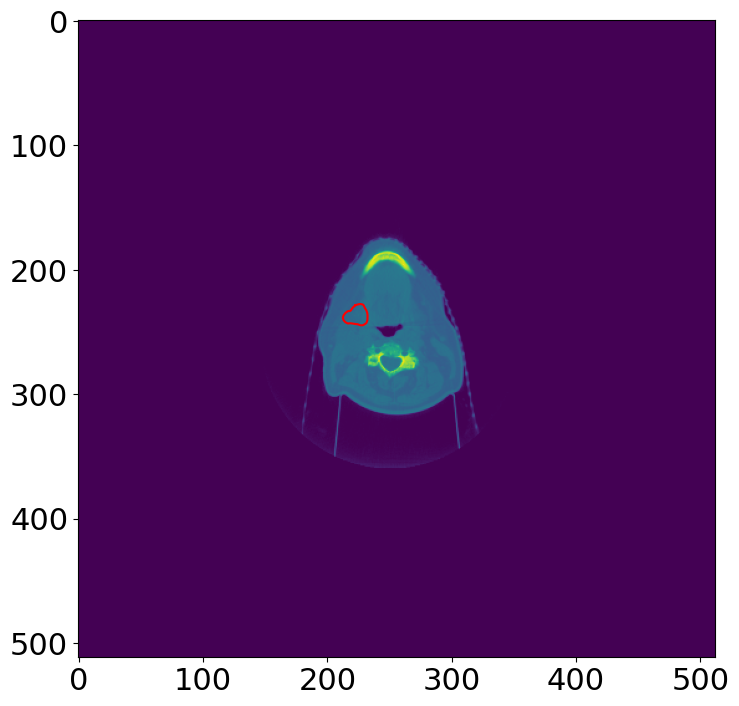

In [130]:
# plot the ROI on one of the registered CBCTs (all x y and slice numbers on the CBCT now correspond to the same slices on the CTs
plot_ROI(sitk.GetArrayFromImage(image_dict['20190712_CT_05_JUL_2019']['resampled_CBCTs'][7])[int(img_slice)], roi_x, roi_y)

### Save registered images

In [131]:
# TO DO -- I have code for saving changed DICOMs but have to check if i did it for SITK types